<h1>Dataset with Dataloader</h1>

In [110]:
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
torch.manual_seed(0)
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

In [21]:
training_path="./fruits-360/Training/"
classes=os.listdir(training_path)
print(classes)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'cherries', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Mara

In [23]:
train_data_list=[]

for file in classes:
    train_images=os.listdir(training_path+file+"/")
    for image in train_images:
        train_data_list.append(training_path+file+"/"+image)
    
print(len(train_data_list))


90406


In [25]:
print(train_data_list[0].split("/")[-2])

Apple Braeburn


In [111]:
class dataset(Dataset):
    def __init__(self,image_path,transform=None):
        self.data_dir=image_path
        self.transform=transform
        self.len=len(image_path)

    def __len__(self):
        return self.len

    def __getitem__(self,idx):
        self.image=Image.open(self.data_dir[idx])
        self.label=self.data_dir[idx].split("/")[-2]
        if self.transform:
            self.image = self.transform(self.image)
            T=transforms.ToPILImage()
            self.image=T(self.image)
            
        return self.image, self.label
        

In [112]:
veri=dataset(train_data_list)

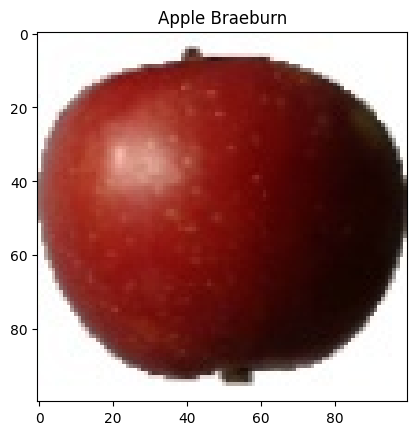

In [113]:
image,label=veri[42]
plt.imshow(image)
plt.title(label)
plt.show()

<h1>Torchvision Transforms</h1>

In [114]:
croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])

In [115]:
fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])

In [116]:
data_corped=dataset(train_data_list,transform=croptensor_data_transform)

In [117]:
data_flipped=dataset(train_data_list,transform=fliptensor_data_transform)

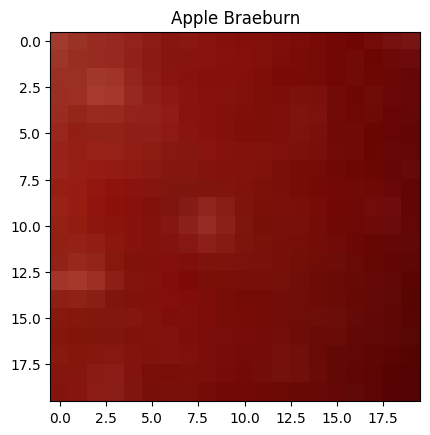

In [119]:
image,label=data_corped[42]
plt.imshow(image)
plt.title(label)
plt.show()

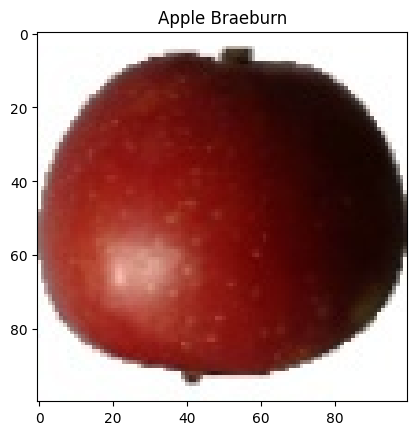

In [120]:
image,label=data_flipped[42]
plt.imshow(image)
plt.title(label)
plt.show()